In [ ]:
!pip install classy-classification

In [ ]:
!python -m spacy download es_core_news_lg

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
import spacy
import classy_classification
from nltk.stem.snowball import SnowballStemmer
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
import re
import seaborn as sns

In [ ]:
# Load the data 
samples =  pd.read_csv('samples_correct V3.csv')
mexico = pd.read_csv('mexico V2.csv')

In [ ]:
samples.head()

In [ ]:
# Replace the text with int 
for col in samples.columns:
    if col.startswith('ACTIVIDAD'):
        samples[col] = samples[col].replace({'SI': 1, 'NO': 0})

for col in mexico.columns:
    if col.startswith('ACTIVIDAD'):
        mexico[col] = mexico[col].replace({'SI': 1, 'NO': 0})

# Clustering 


In [ ]:
samples_classification = samples.filter(like='ACTIVIDAD', axis=1)

In [ ]:
mexico_classification = mexico.filter(like='ACTIVIDAD', axis=1)

In [ ]:
samples_classification

In [ ]:
# Elbow method for the numbers of clusters
# Create an empty list to store WCSS values
wcss = []

# Fit the model to the data and calculate WCSS for 2 to n clusters
for i in range(2, 9+1):
    model = AgglomerativeClustering(n_clusters=i)
    labels = model.fit_predict(samples_classification)
    centers = [samples_classification[labels == j].mean(axis=0) for j in range(i)]
    wcss_i = sum([np.linalg.norm(samples_classification[labels == j]-centers[j])**2 for j in range(i)])
    wcss.append(wcss_i)
    print(f"WCSS for {i} clusters: {wcss}")

WCSS for 2 clusters: [403.7173058013767]
WCSS for 3 clusters: [403.7173058013767, 378.22864366985743]
WCSS for 4 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204]
WCSS for 5 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204, 334.6134167215273]
WCSS for 6 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204, 334.6134167215273, 318.87332068311196]
WCSS for 7 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204, 334.6134167215273, 318.87332068311196, 303.9676063973977]
WCSS for 8 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204, 334.6134167215273, 318.87332068311196, 303.9676063973977, 291.41205084184213]
WCSS for 9 clusters: [403.7173058013767, 378.22864366985743, 355.3138775510204, 334.6134167215273, 318.87332068311196, 303.9676063973977, 291.41205084184213, 280.05747567844344]


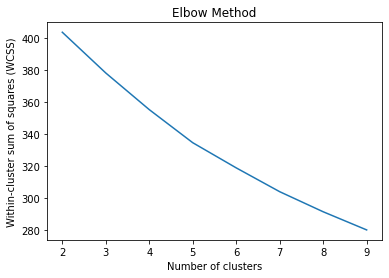

In [ ]:
# Plot the WCSS values against the number of clusters
plt.plot(range(2, 9+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')

# Show the plot
plt.show()

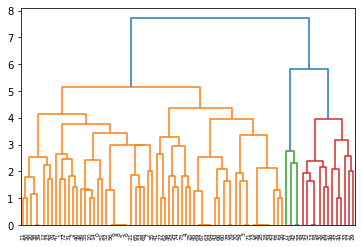

In [ ]:
Z = linkage(samples_classification, method='ward')
dendrogram(Z)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model to the data
agg_clustering.fit(mexico_classification)

# Get the predicted labels
labels = agg_clustering.labels_

# Get the number of clusters
n_clusters = len(set(labels))
print(f'Number of clusters: {n_clusters}')

Number of clusters: 4


In [ ]:
mexico = mexico.assign(cluster=labels)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model to the data
agg_clustering.fit(samples_classification)

# Get the predicted labels
labels = agg_clustering.labels_

# Get the number of clusters
n_clusters = len(set(labels))
print(f'Number of clusters: {n_clusters}')

Number of clusters: 4


In [ ]:
samples = samples.assign(cluster=labels)

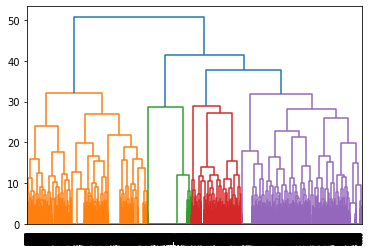

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage matrix
Z = linkage(mexico_classification, method='ward')

# Plot the dendrogram
dendrogram(Z)
plt.show()

In [ ]:
samples

# Cleaning the data 


In [ ]:
#from nltk.stem.snowball import SnowballStemmer
mexico['OBJETO SOCIAL'] = mexico['OBJETO SOCIAL'].str.lower()
mexico["OBJETO SOCIAL"] = mexico['OBJETO SOCIAL'].apply(lambda x: re.sub(r'(?i)[IVXLCDM]+(\.)\s', '', x))
mexico["OBJETO SOCIAL"] = mexico['OBJETO SOCIAL'].apply(lambda x: re.sub(r'[a-z]+(\))', '', x))
mexico["OBJETO SOCIAL"] = mexico['OBJETO SOCIAL'].str.replace(r"<.*>", '', regex=True)
mexico["OBJETO SOCIAL"] = mexico["OBJETO SOCIAL"].str.replace(r"\d+", " ", regex=True)
mexico["OBJETO SOCIAL"] = mexico["OBJETO SOCIAL"].str.replace(r"\n", " ", regex=True)
mexico["OBJETO SOCIAL"] = mexico["OBJETO SOCIAL"].str.replace(r"[,.?!;'´-]", " ", regex=True)
mexico["OBJETO SOCIAL"] = mexico["OBJETO SOCIAL"].str.replace(r"(&nbsp)", " ", regex=True)
mexico['OBJETO SOCIAL'] = mexico['OBJETO SOCIAL'].str.replace(r'_*', '', regex=True)
mexico["OBJETO SOCIAL"] = mexico['OBJETO SOCIAL'].apply(lambda x: re.sub(r'\s{4,}', ' ', x))

In [ ]:
samples['OBJETO SOCIAL'] = samples['OBJETO SOCIAL'].str.lower()
samples["OBJETO SOCIAL"] = samples['OBJETO SOCIAL'].apply(lambda x: re.sub(r'(?i)[IVXLCDM]+(\.)\s', '', x))
samples["OBJETO SOCIAL"] = samples['OBJETO SOCIAL'].apply(lambda x: re.sub(r'[a-z]+(\))', '', x))
samples["OBJETO SOCIAL"] = samples['OBJETO SOCIAL'].str.replace(r"<.*>", '', regex=True)
samples["OBJETO SOCIAL"] = samples["OBJETO SOCIAL"].str.replace(r"\d+", " ", regex=True)
samples["OBJETO SOCIAL"] = samples["OBJETO SOCIAL"].str.replace(r"\n", " ", regex=True)
samples["OBJETO SOCIAL"] = samples["OBJETO SOCIAL"].str.replace(r"[,.?!;'´-]", " ", regex=True)
samples["OBJETO SOCIAL"] = samples["OBJETO SOCIAL"].str.replace(r"(&nbsp)", " ", regex=True)
samples['OBJETO SOCIAL'] = samples['OBJETO SOCIAL'].str.replace(r'_*', '', regex=True)
samples["OBJETO SOCIAL"] = samples['OBJETO SOCIAL'].apply(lambda x: re.sub(r'\s{4,}', ' ', x))

In [ ]:
mexico["OBJETO SOCIAL"][0]

'escritura pública no artículo cuatro  la asociación tendrá por objeto:  colaborar con los esfuerzos dirigidos al desarrollo integral de niñas  niños y jóvenes de méxico en situación vulnerable  con el fin de asegurar su bienestar y participación constructiva en la sociedaasí como toda clase de actividades tendientes a la ayuda desinteresada a comunidades e individuos  para lo cual podrá  de manera enunciativa y no limitativa realizar las siguientes actividades:  impulsar  colaborar y apoyar acciones tendientes a modificar y mejorar las circunstancias de carácter económico social de niñas  niños y jóvenes  a fin de lograr su desarrollo integral  así como fomentar la protección de niñas  niños y jóvenes en riesgo  desventaja física o mental  en función de su incorporación futura a la vida productiva  apoyar y promover el diseño y realización de proyectos de bienestar y asistencia social  así como de programas educativos informal y no formal  que ayuden al desarrollo material y espiritua

# Text catgorization

In [ ]:
nlp = spacy.load('es_core_news_lg')

In [ ]:
labels = {'Asistencia Social': ['organización asistencia solidaria objetivo brindar apoyo recursos personas enfrentan desafíos vida diaria',
  'ofrecemos servicios asesoramiento orientación programas ayuda económica apoyo vivienda servicios salud bienestar',
  'trabajamos comunidades identificar abordar necesidades urgentes promover independencia empoderamiento personas',
  'creemos sociedad justa igualitaria esforzamos ayudar personas superar barreras enfrentan mejorar vidas',
  'cláusula cuarta objeto asociación atención personas carencias socioeconómicas problemas invalidez discapacidad puedan satisfacer requerimientos básicos subsistencia desarrollo',
  'organización grupos fines culturales actividad consista promoción bellas artes investigación científica tecnológica capacitación personas discapacitadas',
  'cumplir objeto social intervenir campañas políticas actividades propaganda destinadas influir legislación',
  'asociación profesional estudios información discapacitado',
  'propugnar mejoramiento social económico discapacitados',
  'escritura artículo asociación persigue fines lucro nacionalidad mexicana objeto otorgar servicios atención psicológica orientación educación asesoría legal difusión investigación prevención rehabilitación materia derechos humanos violencia intrafamiliar sexual maltrato menor mujer familia personas hayan víctimas tales delitos agresores personas señaladas responsables causantes tales ilícitos presenten conductas antisociales agresivas seno familiar pareja descendientes ascendientes',
  'actividades académicas investigación docencia educación formal informal sociales culturales prevención información difusión sensibilización capacitación promover publicación edición libros revistas folletos carteles temas relativos condición hombres masculinidad sexualidad violencia desarrollo humano pareja familia',
  'c crear filiales grupos sucursales núcleos reproduzcan propósitos tareas acciones objeto social crear centros información orientación servicio capacitación distintos lugares territorio nacional forma personal vía telefónica medios',
  'investigar difundir asesorar coadyuvar atender psicológica médica legal asistencialmente capacitar defender representar observar evaluar supervisar organizar grupos eventos informativos académicos educativos crear centros orientación atención defensoría promover publicaciones producciones audiovisuales radiales televisivas carteles propagandas favor asistencia representación apoyo atención términos citados personas hayan acusadas responsables víctimas agresión sexual intrafamiliar maltrato hayan violado derechos garantías individuales derechos humanos civiles general problemática mujer menor',
  'proponer autoridades correspondientes reformas legislativas políticas públicas educativas relativas velar proteger derechos personas víctimas violencia derecho positivo mexicano acuerdos internacionales programas reeducación victimarios',
  'convenios propósitos citados organismos gubernamentales privados civiles particulares internacionales',
  'interceder favor víctimas victimarios atención psicológica emocional médica creando grupos asistencia supervisión capacitación difusión favor derechos mujeres menores personas violentadas víctimas violencia intrafamiliar delitos sexuales transgresión derechos humanos ciudadanos establecer acciones diversas colaboración asistencia asesoría señalado',
  'g investigar recopilar promover publicaciones trabajos relativos diversas disciplinas relacionen análisis situación mujer hombre revistas libros folletos material audiovisual conferencias cine televisión talleres actividades educativas enmarcándolas problemática nacional latinoamericana mundial',
  'mantener relaciones instituciones nacionales extranjeras afines celebración convenios caácter interdisciplinariio intercambio documentos materiales trabajo investigación conjunta asistencia médica psicológica legal necesite ayuda víctimas victimarios actos celebrar convenios relacionen directamente fines sociales',
  'escritura artículo asociación persigue fines lucro nacionalidad mexicana objeto otorgar servicios atención psicológica orientación educación asesoría legal difusión investigación prevención rehabilitación materia derechos humanos violencia intrafamiliar sexual maltrato menor mujer familia personas hayan víctimas tales delitos agresores personas señaladas responsables causantes tales ilícitos presenten conductas antisociales agresivas seno familiar pareja descendientes ascendientes',
  'actividades académicas investigación docencia educación formal informal sociales culturales prevención información difusión sensibilización capacitación promover publicación edición libros revistas folletos carteles temas relativos condición hombres masculinidad sexualidad violencia desarrollo humano pareja familia',
  'c crear filiales grupos sucursales núcleos reproduzcan propósitos tareas acciones objeto social crear centros información orientación servicio capacitación distintos lugares territorio nacional forma personal vía telefónica medios',
  'investigar difundir asesorar coadyuvar atender psicológica médica legal asistencialmente capacitar defender representar observar evaluar supervisar organizar grupos eventos informativos académicos educativos crear centros orientación atención defensoría promover publicaciones producciones audiovisuales radiales televisivas carteles propagandas favor asistencia representación apoyo atención términos citados personas hayan acusadas responsables víctimas agresión sexual intrafamiliar maltrato hayan violado derechos garantías individuales derechos humanos civiles general problemática mujer menor',
  'proponer autoridades correspondientes reformas legislativas políticas públicas educativas relativas velar proteger derechos personas víctimas violencia derecho positivo mexicano acuerdos internacionales programas reeducación victimarios',
  'convenios propósitos citados organismos gubernamentales privados civiles particulares internacionales',
  'interceder favor víctimas victimarios atención psicológica emocional médica creando grupos asistencia supervisión capacitación difusión favor derechos mujeres menores personas violentadas víctimas violencia intrafamiliar delitos sexuales transgresión derechos humanos ciudadanos establecer acciones diversas colaboración asistencia asesoría señalado',
  'g investigar recopilar promover publicaciones trabajos relativos diversas disciplinas relacionen análisis situación mujer hombre revistas libros folletos material audiovisual conferencias cine televisión talleres actividades educativas enmarcándolas problemática nacional latinoamericana mundial',
  'mantener relaciones instituciones nacionales extranjeras afines celebración convenios caácter interdisciplinariio intercambio documentos materiales trabajo investigación conjunta asistencia médica psicológica legal necesite ayuda víctimas victimarios actos celebrar convenios relacionen directamente fines sociales'],
 'Educación': ['organización ayuda educativa objetivo proporcionar recursos apoyo personas enfrentan desafíos ámbito educativo',
  'ofrecemos programas tutorías becas asesoramiento carreras ayudar estudiantes edades alcanzar máximo potencial académico',
  'trabajamos escuelas comunidades mejorar acceso educación promover ambiente aprendizaje ayudar construir futuro educación',
  'asociación objeto reunir representantes juveniles organizaciones sociedad civil facilitar diálogo intercambio ideas apoyo mutuo',
  'impartir organizar cursos talleres instituciones académicas gubernamentales otorgar organizaciones juveniles capacitación requerida lograr objetivos',
  'promover certificación organizaciones juveniles león',
  'recaudar fondos proyectos federación organizaciones miembros',
  'vínculo diálogo interacción sociedad civil academia organizaciones culturales intelectuales nacionales extranjeras sector privado gobierno medios comunicación',
  'artículo objeto asociación objeto impartir cursos reconocimiento validez oficial impartir cursos básicos bienestar familiar personal promoción educación primaria secundaria preparatoria media superior grados niveles investigaciòn aplicaciòn diversos métodos enseñanza implantados país institución promocer bienestar mejoramiento social colaborar desarrollo mujer escasos recursos apoyo brinde personas condición social organización auxilio resolver problemas educación adquirir disponer operar activos bienes muebes inmuebles material equipo necesario realización objeto social formar parate asociaciones instituciones fundaciones general celebrar ejecutar actos contratos convenios anexos conexos aon objeto social',
  'asociaciòn fines propósitos lucro',
  'organización educación objetivo mejorar acceso calidad educación personas',
  'ofrecemos programas tutorías becas asesoramiento carreras ayudar estudiantes edades alcanzar máximo potencial académico',
  'trabajamos escuelas comunidades mejorar acceso educación promover ambiente aprendizaje positivo',
  'brindamos capacitación apoyo maestros educadores mejorar práctica proporcionar educación calidad estudiantes',
  'esforzamos eliminar barreras socioeconómicas culturales acceso educación promover inclusión diversidad aula',
  'fomentamos enfoque aprendizaje basado vida real educación desarrollo sostenible',
  'organización dedica investigación innovación campo educación identificar adoptar prácticas pedagógicas tecnológicas innovadoras mejoren aprendizaje enseñanza',
  'trabajamos colaboración gobiernos organizaciones educativas organizaciones fines lucro mejorar sistema educativo nivel local nacional',
  'creemos educación calidad esencial desarrollo personal social esforzamos ayudar personas alcanzar máximo potencial educativo',
  'organización educación futuro objetivo mejorar acceso calidad educación personas',
  'ofrecemos programas tutorías becas asesoramiento carreras ayudar estudiantes edades alcanzar máximo potencial académico',
  'trabajamos escuelas comunidades mejorar acceso educación promover ambiente aprendizaje positivo',
  'enfocamos formación maestros mejorar calidad educación escuelas comunidades',
  'esforzamos abordar desigualdades educativas garantizar estudiantes tengan acceso educación calidad independientemente origen socioeconómico',
  'trabajamos familias comunidades brindar apoyo recursos adicionales aprendizaje',
  'esforzamos incorporar tecnología programas educativos mejorar eficacia eficiencia educación brindar estudiantes habilidades conocimientos necesarios éxito mundo digital',
  'resumen organización comprometida mejorar acceso calidad educación personas trabajamos duro ayudar estudiantes alcanzar máximo potencial académico prepararlos futuro exitoso'],
 'Arte y Cultura': ['organización arte cultura enfoca promover diversidad inclusión mundo arte cultura',
  'ofrecemos talleres programas mentores oportunidades exposición artistas emergentes edades etnias habilidades',
  'trabajamos instituciones culturales asegurar programación representación refleje diversidad comunidad',
  'creemos arte cultura fundamentales sociedad saludable comprometidos hacerlos accesibles',
  'intrumento notarial fecha abril articulo asociación común lícito lucrativo preponderantemente económico conservar incrementar acervo plástico biblioteca instituto artes gráficas oaxaca obra fotográfica centro alvarez comun principal quedan comprendidas enunciativa limitativamente siguientes actividades aplicar prioritaria recursos requerimientos conservacion mantenimiento necesarios instituto artes gráficas oaxaca obra fotográfica centro alvarez bravo bibliografico colaborar actividades culturales investigarcion cientifica lleven cabo principalmente relacionadas labor artistica fótografo manuel alvarez actividades promover adquisición obras artísticas cientificas culturales forma legal formen colección artística asociación adqusición equipo elementos necesarios eficaz cumplimiento promover desarrollo servicios colaboraciones publicaciones exposiciones itinerantes apoyo técnicoy actividades similares difusión beneficio instituto artes gráficas oaxaca obra fotográfica centro alvarez promover establecimiento relaciones instituciones similares pais extranjero publicas privadas fomento beneficio actividades promoverla evnta ediciones especiales folletos monografias catalogos láminas copias autorizadas obras arte actividades índole semejante tiendan producir ingresos asociación cumplir organizar promover conferencias espectaculos índole artística cientifica cultural tendientes difusión beneficio actividades difundir comunicación actividades experiencias investigaciones realizaciones asociación comprar vender enajenar adquirir gravar hipotecra obtener goce temporal tipo bienes muebles inmuebles derechos relaes necesarios convenientes realización efectuar actos jurídicos carácter especulativo permitidos leyes estatutos tiendan cumplir principal asociación',
  'organización arte cultura objetivo promover participación acceso cultura arte personas',
  'ofrecemos programas talleres exhibiciones eventos culturales ayudar personas descubrir apreciar artes cultura',
  'trabajamos artistas creadores apoyar trabajo promover trabajo nivel nacional internacional',
  'enfocamos preservación fortalecimiento cultura patrimonio comunidades',
  'esforzamos abordar desigualdades culturales garantizar ciudadanos tengan acceso cultura artes independientemente origen socioeconómico',
  'trabajamos comunidades brindar apoyo recursos adicionales participación actividades culturales',
  'esforzamos promover diversidad inclusión actividades personas sientan bienvenidas representadas mundo arte cultura',
  'resumen organización comprometida promover participación acceso cultura arte personas trabajamos duro apoyar artistas creadores preservar fortalecer cultura', ' La promoción, difusión, protección, conservación y fomento de las obras artísticas en todos sus géneros del maestro Jose Luis Cuevas Novelo, sin un carácter preponderante económico.', 
  'la organización, planeación, coordinación, desarrollo y administración del Museo Jose Luis Cuevas, su biblioteca, mobiliario y todas y cada una de las áreas que lo conforman.', 
  'La promoción, difusión y la coordinación de eventos para el fomento de las exposiciones permanentes y temporales de obras artísticas propias o de terceros que se realicen en el citado museo o e territorio nacional y en el extranjero', 
  'El fomento, la organización y la difusión de las Bellas Artes, en las ramas de las artes dramáticas y el teatro, por todos los medios posibles y orientada esta última hacia el público en general y en especial hacia las clases populares y la población escolar', 
  'Producción, traducción y exhibición de todo tipo de obras teatrales, procurando siempre el estudio y atención de los asuntos relativos a la integración, fomento y desarrollo de la industria teatral nacional e internacional.'],
 'Medio Ambiente': ['organización conservación ambiental objetivo ayudar personas comprender proteger ambiente',
  'ofrecemos programas educativos sensibilización fomentar conciencia ambiental proyectos conservación restauración ecosistemas',
  'trabajamos colaboración organizaciones gobiernos promover políticas prácticas sostenibles creemos esencial proteger planeta generaciones presentes futuras esforzamos diferencia real conservación ambiente',
  'capitulo articulo objeto',
  'desarrollar centros capacitación brinden niñez juventud familia público general conocimientos habilidades conservación ambiente programa activo juegos talleres demostraciones otorgar promover apoyo financiero material moral organizaciones fines lucro dediquen conservación ambiente estén autorizadas emitir recibos deducibles impuestos',
  'promover desarrollo relaciones individuos organizaciones interesadas conservación ambiente tipo información relevante desarrollo comunidad puebla establezcan centros ecológicos',
  'incrementar interés sociedad gobiernos lograr comprensión apoyo actividades filantrópicas lleven cabo comunidad procurando incremente asignación aprovechamiento ambiente',
  'recibir donativos efectivo especie bienes muebles inmuebles naturaleza asociados terceras personas propósito cumplir objeto',
  'cabo terceros desarrollo estudios técnicas propicien actividades conservación preservación ambiente fortalecimiento educación despertar conciencia ecológica',
  'publicar editar imprimir promover tipo obras ayuden conservación ambiente',
  'obtener clase préstamos créditos garantía específica otorgar prestamos conveniente fines asociación',
  'otorgar clase garantías avales obligaciones títulos crédito aceptarlos endosarlos incluyendo garantizados forma real ó preferente medida conveniente logro objetivos asociación',
  'adquirir propiedad donación adjudicación permuta dación pago reporto cesión general permitido ley clase bienes muebles inmuebles derechos reales personales darlos tomar arrendamiento comodato destinarlos cumplimiento objeto social supervisar contratar terceros clase construcciones edificaciones',
  'obtener adquirir utilizar disponer clase patentes marcas certificados inversión nombres comerciales derechos autor opciones preferencias derechos méxico extranjero',
  'general celebrar actos contratos operaciones conexas accesorios accidentales necesarios convenientes realización objetos anteriores',
  'actividades desarrolle asociación finalidad primordial cumplimiento objeto social puedan intervenir campañas políticas involucrarse actividades propaganda destinadas influir considerará influye legislación publicación análisis investigación carácter proselitista asistencia técnica órgano gubernamental hubiere solicitado escrito',
  'organización ambiente objetivo proteger promover ambiente personas',
  'ofrecemos programas sensibilización educación ambiental ayudar personas comprender apreciar ambiente',
  'trabajamos organizaciones gobiernos promover políticas prácticas sostenibles realizamos proyectos conservación restauración ecosistemas',
  'esforzamos abordar desigualdades ambientales garantizar personas tengan acceso ambiente saludable sostenible',
  'trabajamos colaboración comunidades identificar abordar necesidades ambientales promover sostenible recursos naturales',
  'esforzamos fomentar educación ambiental conciencia ambiental ayudar personas comprender impacto ambiente tomar medidas reducirlo'],
  'Desarrollo económico y comunitario': ['organización desarrollo comunitario objetivo apoyar desarrollo económico social comunidades',
  'ofrecemos programas capacitación asesoramiento negocios acceso financiamiento apoyo creación empleo creación riqueza',
  'trabajamos líderes comunitarios organizaciones identificar abordar necesidades económicas sociales comunidades promover desarrollo sostenible',
  'creemos economía fuerte esencial bienestar personas comunidades esforzamos ayudar personas mejorar vidas desarrollo económico comunitario',
  'escritura número noventa dosartículo tercerol asociación propone medios mejoramiento calidad vida comunidades rurales urbanas coahuila condiciones marginación pobreza requieran solidaridad participación social coahuilenses superar rezagos materia educación alimentación salud vivienda cultura promover concentración voluntades suma esfuerzos asociados familias organizaciones gubernamentales clubes servicio sindicatos instituciones educación superior beneficencia personas físicas morales compartan propósito común apoyar sectores población coahuilense encuentren situación extrema clase actividades educativas cívicas deportivas sociales científicas técnicas culturales organizar conferencias seminarios cursos cursillos muestras exposiciones propósito preservar tradiciones difundir cultura elevar nivel educativo mejorar calidad vida coahuilenses',
  'contribuir elevar nivel bienestar sectores sociales coahuilenses proveyendo medida posibilidades satisfactores medida educación salud alimentación recreación recibir tipo instituciones oficiales asociaciones públicas privadas mexicanas extranjeras donativos dinero especie destinarlos consecución objeto social expedir correspondientes recibos deducibles impuestos tipo eventos promociones campañas tendientes obtención recursos económicos destinarlos satisfacer necesidades sentidas comunidades urbanas rurales mayores clase actividades cívicas deportivas sociales científicas educativas técnicas beneficio sectores sociales coahuilenses fomentar relaciones familiares sociales deportivas culturales cursillos materia higiene alimentación planeación familiar superación personal beneficio comunidad actividades enumeradas persigan fines adquirir bienes muebles inmuebles necesarios cumplimiento objeto social realización clase actos contratos convenios necesarios asociación realice formular sugerencias recomendaciones órganos gobierno federal estatal municipal acciones planes programas trabajo canalizados comunidades mayores carencias',
  'asociación representado capital acciones perseguir fines lucro',
  'artículo objeto sociedad impulsar desarrollo municipios regiones méxico tipo servicios consultoría consolidación proyectos materia desarrollo económico social finanzas públicas planeación desarrollo',
  'apoyo desarrollo pueblos comunidades indígenas',
  'promoción fomento educativo cultural artístico científico tecnológico',
  'fomento acciones mejorar economía popular',
  'apoyos estímulos públicos reciban destinaos exclusivamente cumplimiento objeto social',
  'capacitación servicios educativos desarrollo institucional fortalecimiento gobiernos locales organizaciones sociales desarrollo regional',
  'c elaboración estudios operación proyectoos mercado justo desarrollo rural representen alternativas elevar nivel condiciones vida población municipios regioens pobres',
  'otorgar licencias franquicias prestación servicios asesorías consultorías imparticion cursos capacitación general',
  'g administrar prestar servicios personal organizaciones similares elaborando realizando clase asesorías investigaciones estudios trabajos propuestas proyectos acciones colaboren promoción concreción común',
  'h contratación capacitación personal',
  'k sociedad constituirse aval otorgar garantías favor terceros ocasional',
  'l ejecución actos contratos convenios civiles mercantiles administrativos especie demanda realización fines mencionados',
  'm gestionar proporcionar asistencia técnica apoyo científico financiero educativo capacitación adiestramiento grupos organizaciones sector rural realización proyectos económicos productivos educativos salud',
  'recibir dinero título préstamo intereses pudiendo celebrar otorgar tipo contratos organizaciones nacionales crédito entidades financieras nacionales extranjeros personas físicas morales cumplimiento fines sociales',
  'formar asociaciones sociedades civiles mercantiles q crear fortalecer incubadoras empresas r crear apoyar fortalecer centros desarrollo empresarial negocios t conformar bancos información oportunidades mercado registro fe oferta demanda productos procesos servicios desarrollar procesos exportación tipo comercio mercado interno v promover integración cadenas productivas esquemas asociación empresarial', 'Promover la participación organizada de los asociados y de la población en general, en acciones que mejoren sus propias condiciones de subsistencia, en  beneficio de la comunidad', 
  'La ejecución de acciones orientadas al beneficio social, la educación y la capacitación para el trabajo.', 
  'La asociación no persigue fines de lucro.'],
 'Derechos Humanos': ['organización defensa derechos humanos objetivo proteger promover derechos humanos personas',
  'ofrecemos asesoría legal programas capacitación sensibilización apoyo víctimas violaciones derechos humanos',
  'trabajamos colaboración organizaciones gobiernos denunciar violaciones derechos humanos promover cambios políticas prácticas',
  'creemos personas merecen vivir dignidad ambiente respeto derechos esforzamos diferencia real defensa promoción derechos humanos',
  'escritura artículo comisión michoacana derechos humanos organismo guberanamental tendra objetivos intervenir siguientes casos',
  'administrativas vicios procedimientos delitos lesionen persona grupo cometidos autoridad servidor público',
  'administrativas vicios procedimientos delitos lesionen persona grupo sociedad general cometido agentes sociales cuya impunidad provenga anuencia tolerancia autoridad servidor público',
  'casos ocurran incisos anteriores negligencia imputable autoridad servidor publico',
  'organización defensa derechos humanos objetivo proteger promover derechos humanos personas',
  'ofrecemos asesoría legal programas capacitación sensibilización apoyo víctimas violaciones derechos humanos',
  'trabajamos colaboración organizaciones gobiernos denunciar violaciones derechos humanos promover cambios políticas prácticas',
  'creemos personas merecen vivir dignidad ambiente respeto derechos esforzamos diferencia real defensa promoción derechos humanos',
  'organización intervenimos casos violaciones administrativas vicios procedimientos delitos lesionen persona grupo cometidos autoridad servidor público casos violaciones cometidas agentes sociales cuya impunidad provenga anuencia tolerancia autoridad servidor público casos ocurran negligencia imputable autoridad servidor público',
  'organización voz derechos humanos dedica promoción protección derechos humanos personas',
  'ofrecemos servicios asesoramiento legal capacitación sensibilización apoyo víctimas violaciones derechos humanos',
  'trabajamos estrecha colaboración organizaciones gobiernos denunciar violaciones derechos humanos presionar cambios políticas prácticas',
  'creemos personas merecen vivir dignidad ambiente respeto derechos esforzamos diferencia real defensa promoción derechos humanos',
  'organización especializa intervención casos violaciones derechos humanos ámbito laboral violencia género discriminación abuso autoridades',
  'ofrecemos servicios atención víctimas asesoramiento legal campañas sensibilización promover cambio políticas prácticas áreas',
  'organización justicia dedica defensa promoción derechos humanos mundo',
  'trabajamos garantizar personas tengan acceso justicia tratadas dignidad respeto',
  'ofrecemos servicios legales gratuitos programas capacitación sensibilización brindamos apoyo víctimas violaciones derechos humanos',
  'colaboramos organizaciones gobiernos denunciar violaciones derechos humanos presionar cambios políticas prácticas',
  'creemos personas merecen vivir mundo respeten derechos humanos esforzamos diferencia real defensa promoción derechos humanos',
  'organización enfoca temas derecho educación libertad expresión discriminación derecho juicio justo',
  'trabajamos comunidades marginadas desfavorecidas garantizar derechos respetados protegidos'],
 'Salud': ['organización salud objetivo mejorar acceso calidad atención médica personas',
  'ofrecemos programas prevención tratamiento atención pacientes capacitación asesoramiento profesionales salud',
  'trabajamos colaboración hospitales clínicas organizaciones salud mejorar sistema salud abordar desigualdades atención médica',
  'creemos personas merecen acceso servicios salud calidad esforzamos mejorar vidas personas promoción salud sostenible accesible',
  'escritura número',
  'objeto asociación atención médica clínica personas escasos recursos especialmente menores ancianos inválidos requieran apoyo atención psicológica psiquiátrica',
  'proporcionar recibir clase servicios profesionales técnicos apoyo comunidad especial relacionados hipnosis psicoterapia medicina psicosomática desarrollo humano integral medicina holística alternativa tipo disciplinas puedan utilizadas lograr bienestar salud integral pacientes vean beneficiados',
  'clase investigaciones objetos anteriores desarrollar métodos sistemas desarrollo capacitación profesionales instituciones interesadas bienestar salud integral personas f',
  'proporcionar terapias grupos individuales familiares trabajos investigación aplicando técnicas señaladas objeto social beneficio profesionales materia apoyo comunidad mejoramiento bienestar salud integral',
  'promover investigación química agrupar profesionales pedagogía psicología enfermería odontología trabajo social medicina terapeutas especialistas desarrollo humano medicina holística alternativa tipo disciplinas puedan utilizadas logra bienestar salud integral personas',
  'desarrollar actividades científicas congresos simposiums mesas redondas convenciones platicas profesionales interesados materia tipo nacional internacional conjunta institutos profesionales áreas señaladas objeto social interesados bienestar salud integral personas',
  'actividades mencionadas objetivo favorecer intercambio conocimientos experiencias profesionales instituciones encuentren interesadas técnicas mencionadas m',
  'brindar asesoría instituciones públicas privadas sociales instituciones gubernamentales soliciten escrito programas promoción adecuado materias incisos anteriores reglamento',
  'escritura artículo asociación constituye objeto persigan fines lucrativos',
  'atención médica personas escasos recursos niños jóvenes adultos edad importar sexo raza religión padezcan cáncer huesos músculos puedan calidad vida reintegrarlos ámbito laboral social sucesivo denominará enfermos',
  'proporcionar enfermos atención médica psicológica rehabilitación instituciones centros salud externos asociación',
  'brindar instituciones centros salud ajenos asociación opciones tratamiento enfermos afectados tumores óseos partes blandas lesiones pseudotumorales',
  'promover difundir campañas información opciones tratamiento enfermos familiares población general comunidad médica',
  'capacitar enfermos integración sociedad trabajo educación deporte',
  'participar creación organismos coadyuven bienestar enfermo',
  'coadyuvar investigaciones relación patología puedan traducir beneficio enfermos',
  'análisis estudios tendientes creación proyectos planes programas permitan eficaz idónea interacción enfermos sociedad',
  'promover capacitación adiestramiento pro enfermos reincorporarlos sociedad ente productivo',
  'solicitar cooperación instituciones salud país extranjero efecto implementar país innovaciones científicas tecnológicas pro enfermos',
  'promover creación obras texto consulta enseñanza guía enfermo comunidad médica',
  'promover apertura talleres dé ocupación enfermos contratos trabajo vigilando perciban salarios ley señala trabajadores',
  'solicitar creación bolsa trabajo enfermos estén desempleados',
  'establecer biblioteca permita enfermos acceso libros relacionados padecimientos',
  'apoyar fomentar investigaciones científicas tecnológicas apoyo desarrollo enfermos patología',
  'promover apoyo centros salud proporcione título gratuito médico especializado suministro medicamentos hospitalización enfermos',
  'brindar ayuda psicológica emocional enfermos familiares',
  'emprender campañas información médicos población general tratar evitar procedimientos cirugía radical enfermos realización diagnóstico oportuno tratamientos adecuados']}

In [ ]:
# Clean Labels
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = list(es_stop)

cleaned_labels = {}
for key, value in labels.items():
    cleaned_values = []
    for string in value:
        words = word_tokenize(string.lower())
        cleaned_words = [word for word in words if word.lower() not in stop_words and word.isalpha() and len(word)>1]
        cleaned_values.append(" ".join(cleaned_words))
    cleaned_labels[key] = cleaned_values

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cleaned_labels

In [ ]:
nlp.add_pipe(
    'text_categorizer', 
    config={'data':cleaned_labels,
        'model':"sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        'device':'gpu'
    }
)
print(nlp("Artículo segundo.- Objeto La Asociación tendrá por objeto:Impartir cursos con reconocimiento de validez oficial; impartir cursos básicos de bienestar familiar y personal; la promoción de la Educación Primaria, Secundaria y preparatoria o Media Superior, en  todos sus grados y niveles, la investigaciòn y aplicaciòn de los diversos métodos de enseñanza, implantados en cualquier País o institución; promocer el bienestar y el mejoramiento social y colaborar con el desarrollo de la mujer de escasos recursos mediante el apoyo que se les brinde a estas personas que por su condición social, organización y auxilio para  resolver sus problemas de educación; adquirir, disponer y operar todos los activos, bienes muebes e inmuebles, así como el material y equipo necesario para la realización de su objeto social; formar parate de otras asociaciones, instituciones o fundaciones; en general celebrar y ejecutar todos los actos, contratos  y convenios que sean anexos y conexos aon su objeto social. Esta Asociaciòn no tendrá fines o propósitos de lucro")._.cats)

In [ ]:
# Stop words 
mexico['text_without_stopwords'] = mexico['OBJETO SOCIAL'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
samples['text_without_stopwords'] = samples['OBJETO SOCIAL'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
mexico['categories'] = ''
mexico['predicted_category'] = ''
mexico['predicted_category_value'] = ''
mexico['second_category'] = ''
mexico['second_category_value'] = ''
mexico['third_category'] = ''
mexico['third_category_value'] = ''
for index, row in mexico.iterrows():
  doc = nlp(row['text_without_stopwords'])
  categories = doc._.cats
  max_key, max_value = max(doc._.cats.items(), key=lambda x:x[1])
  sorted_data = sorted(doc._.cats.items(), key=lambda x:x[1], reverse=True)
  mexico.at[index, 'categories'] = categories
  mexico.at[index, 'predicted_category'] = max_key
  mexico.at[index, 'predicted_category_value'] = max_value
  mexico.at[index, 'second_category'] = sorted_data[1][0]
  mexico.at[index, 'second_category_value'] = sorted_data[1][1]
  mexico.at[index, 'third_category'] = sorted_data[2][0]
  mexico.at[index, 'third_category_value'] = sorted_data[2][1]

In [ ]:
samples['categories'] = ''
samples['predicted_category'] = ''
samples['predicted_category_value'] = ''
samples['second_category'] = ''
samples['second_category_value'] = ''
samples['third_category'] = ''
samples['third_category_value'] = ''
for index, row in samples.iterrows():
  doc = nlp(row['text_without_stopwords'])
  categories = doc._.cats
  max_key, max_value = max(doc._.cats.items(), key=lambda x:x[1])
  sorted_data = sorted(doc._.cats.items(), key=lambda x:x[1], reverse=True)
  samples.at[index, 'categories'] = categories
  samples.at[index, 'predicted_category'] = max_key
  samples.at[index, 'predicted_category_value'] = max_value
  samples.at[index, 'second_category'] = sorted_data[1][0]
  samples.at[index, 'second_category_value'] = sorted_data[1][1]
  samples.at[index, 'third_category'] = sorted_data[2][0]
  samples.at[index, 'third_category_value'] = sorted_data[2][1]

In [ ]:
samples['Asistencia Social'] = 0
samples['Educación'] = 0
samples['Arte y Cultura'] = 0
samples['Medio Ambiente'] = 0
samples['Desarrollo económico y comunitario'] = 0
samples['Derechos Humanos'] = 0
samples['Salud'] = 0
for index, row in samples.iterrows():
  doc = nlp(row['text_without_stopwords'])
  samples.at[index,'Asistencia Social'] = doc._.cats['Asistencia Social']
  samples.at[index,'Educación'] = doc._.cats['Educación']
  samples.at[index,'Arte y Cultura'] = doc._.cats['Arte y Cultura']
  samples.at[index,'Medio Ambiente'] = doc._.cats['Medio Ambiente']
  samples.at[index,'Desarrollo económico y comunitario'] = doc._.cats['Desarrollo económico y comunitario']
  samples.at[index,'Derechos Humanos'] = doc._.cats['Derechos Humanos']
  samples.at[index,'Salud'] = doc._.cats['Salud']

In [ ]:
mexico['Asistencia Social'] = 0
mexico['Educación'] = 0
mexico['Arte y Cultura'] = 0
mexico['Medio Ambiente'] = 0
mexico['Desarrollo económico y comunitario'] = 0
mexico['Derechos Humanos'] = 0
mexico['Salud'] = 0
for index, row in mexico.iterrows():
  doc = nlp(row['text_without_stopwords'])
  mexico.at[index,'Asistencia Social'] = doc._.cats['Asistencia Social']
  mexico.at[index,'Educación'] = doc._.cats['Educación']
  mexico.at[index,'Arte y Cultura'] = doc._.cats['Arte y Cultura']
  mexico.at[index,'Medio Ambiente'] = doc._.cats['Medio Ambiente']
  mexico.at[index,'Desarrollo económico y comunitario'] = doc._.cats['Desarrollo económico y comunitario']
  mexico.at[index,'Derechos Humanos'] = doc._.cats['Derechos Humanos']
  mexico.at[index,'Salud'] = doc._.cats['Salud']

# Title categorization 

In [ ]:
label_title = {'Arte y Cultura title':['Arte', 'Cultural', 'Teatro', 'Música', 'Compañia', 'Arte', 'Maestro', 'Cultural'], 
               'Educación title':['Educación', 'Edu', 'Joven', 'Instituto', 'Educativo', 'Colegios', 'Niño' ],
               'Medio Ambiente Title':['Medio ambiente', 'Animales', 'Ecología', 'Sustentable', 'Protección', 'Tierra', 'Naturaleza', 'Planeta', 'Sustentable'], 
               'Derechos Humanos title': ['Derechos humanos', 'Derechos humanos', 'Derechos humanos', 'Derechos humanos', 'Derechos humanos', 'Derechos humanos', 'Derechos humanos', 'Derechos humanos'], 
               'Religión title': ['Cristiano', 'San', 'Iglesia', 'Católico', 'Dios', 'Nuestra Señora', 'Virgen', 'Jesús', 'Santa', 'Misioneros'], 
               'Salud title': ['Salud', 'Ortopédico', 'Cáncer', 'Hospital'],
               'Desarrollo económico y comunitario title': ['económico y comunitario', 'Trabajadores', 'Agrícolas', ], 
               'Other title': ['Grupo','Centro', 'Servicio', 'Asociación', 'Visión']}

In [ ]:
nlp_title = spacy.load('es_core_news_lg')
nlp_title.add_pipe(
    'text_categorizer', 
    config={'data':label_title,
        'model':"sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        'device':'gpu'
    }
)

In [ ]:
samples['Arte y Cultura title'] = 0
samples['Medio Ambiente Title'] = 0
samples['Religión title'] = 0
samples['Derechos Humanos title'] = 0
samples['Educación title'] = 0
samples['Salud title'] = 0
samples['Other title'] = 0
for index, row in samples.iterrows():
  doc = nlp_title(row['RAZON SOCIAL'])
  samples.at[index,'Arte y Cultura title'] = doc._.cats['Arte y Cultura title']
  samples.at[index,'Medio Ambiente Title'] = doc._.cats['Medio Ambiente Title']
  samples.at[index,'Derechos Humanos title'] = doc._.cats['Derechos Humanos title']
  samples.at[index,'Religión title'] = doc._.cats['Religión title']
  samples.at[index,'Educación title'] = doc._.cats['Educación title']
  samples.at[index,'Salud title'] = doc._.cats['Salud title']
  samples.at[index,'Other title'] = doc._.cats['Other title']

In [ ]:
mexico['Arte y Cultura title'] = 0
mexico['Medio Ambiente Title'] = 0
mexico['Religión title'] = 0
mexico['Derechos Humanos title'] = 0
mexico['Educación title'] = 0
mexico['Salud title'] = 0
mexico['Other title'] = 0
for index, row in mexico.iterrows():
  doc = nlp_title(row['RAZON SOCIAL'])
  mexico.at[index,'Arte y Cultura title'] = doc._.cats['Arte y Cultura title']
  mexico.at[index,'Medio Ambiente Title'] = doc._.cats['Medio Ambiente Title']
  mexico.at[index,'Derechos Humanos title'] = doc._.cats['Derechos Humanos title']
  mexico.at[index,'Religión title'] = doc._.cats['Religión title']
  mexico.at[index,'Educación title'] = doc._.cats['Educación title']
  mexico.at[index,'Salud title'] = doc._.cats['Salud title']
  mexico.at[index,'Other title'] = doc._.cats['Other title']

In [ ]:
samples

# Actividad 

In [ ]:
{'ACTIVIDAD 1': 'Asistencia Social', 
 'ACTIVIDAD 2': 'Desarrollo económico y comunitario', 
 'ACTIVIDAD 3': 'Derechos Humanos', 
 'ACTIVIDAD 5': 'Asistencia Social', 
 'ACTIVIDAD 7': 'Asistencia Social', 
 'ACTIVIDAD 8': 'Desarrollo económico y comunitario', 
 'ACTIVIDAD 9': 'Derechos Humanos', 
 'ACTIVIDAD 11': 'Salud', 
 'ACTIVIDAD 12': 'Medio Ambiente', 
 'ACTIVIDAD 13': 'Arte y Cultura', 
 'ACTIVIDAD 14': 'Desarrollo económico y comunitario',
 'ACTIVIDAD 17': 'Desarrollo económico y comunitario', 
 }
samples['Asistencia Social ac'] = 0
samples['Arte y Cultura ac'] = 0
samples['Medio Ambiente ac'] = 0
samples['Desarrollo económico y comunitario ac'] = 0
samples['Derechos Humanos ac'] = 0
samples['Salud ac'] = 0
for index, row in samples.iterrows():
  if row['ACTIVIDAD 1'] == 1:
    samples.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 2'] == 1:
    samples.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 3'] == 1:
    samples.at[index, 'Derechos Humanos ac'] += 1
  if row['ACTIVIDAD 5'] == 1:
    samples.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 7'] == 1:
    samples.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 8'] == 1:
    samples.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 9'] == 1:
    samples.at[index, 'Derechos Humanos ac'] += 1
  if row['ACTIVIDAD 11'] == 1:
    samples.at[index, 'Salud ac'] += 1
  if row['ACTIVIDAD 12'] == 1:
    samples.at[index, 'Medio Ambiente ac'] += 1
  if row['ACTIVIDAD 13'] == 1:
    samples.at[index, 'Arte y Cultura ac'] += 1
  if row['ACTIVIDAD 14'] == 1:
    samples.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 17'] == 1:
    samples.at[index, 'Desarrollo económico y comunitario ac'] += 1

In [ ]:
mexico['Asistencia Social ac'] = 0
mexico['Arte y Cultura ac'] = 0
mexico['Medio Ambiente ac'] = 0
mexico['Desarrollo económico y comunitario ac'] = 0
mexico['Derechos Humanos ac'] = 0
mexico['Salud ac'] = 0
for index, row in mexico.iterrows():
  if row['ACTIVIDAD 1'] == 1:
    mexico.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 2'] == 1:
    mexico.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 3'] == 1:
    mexico.at[index, 'Derechos Humanos ac'] += 1
  if row['ACTIVIDAD 5'] == 1:
    mexico.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 7'] == 1:
    mexico.at[index, 'Asistencia Social ac'] += 1
  if row['ACTIVIDAD 8'] == 1:
    mexico.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 9'] == 1:
    mexico.at[index, 'Derechos Humanos ac'] += 1
  if row['ACTIVIDAD 11'] == 1:
    mexico.at[index, 'Salud ac'] += 1
  if row['ACTIVIDAD 12'] == 1:
    mexico.at[index, 'Medio Ambiente ac'] += 1
  if row['ACTIVIDAD 13'] == 1:
    mexico.at[index, 'Arte y Cultura ac'] += 1
  if row['ACTIVIDAD 14'] == 1:
    mexico.at[index, 'Desarrollo económico y comunitario ac'] += 1
  if row['ACTIVIDAD 17'] == 1:
    mexico.at[index, 'Desarrollo económico y comunitario ac'] += 1

In [ ]:
samples

# Random forest classifier

In [ ]:
samples_without_actividad = samples.drop(samples.filter(regex='ACTIVIDAD.*').columns, axis=1)

In [ ]:
samples_without_actividad

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = samples_without_actividad['Correct '].values
X = samples_without_actividad[samples_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords'])].values

In [ ]:
X_names = samples_without_actividad[samples_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords'])]

In [ ]:
X_names = mexico_without_actividad[mexico_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords'])]

In [ ]:
# One hot encoding 
from sklearn.preprocessing import OneHotEncoder

# Create the encoder
ohe = OneHotEncoder()

# Fit the encoder on the 'y' labels
ohe.fit(y.reshape(-1, 1))

# Transform 'y' labels to one-hot-encoded values
y = ohe.transform(y.reshape(-1, 1))
y = y.toarray()

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=150, random_state=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.813953488372093

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=50)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=50)

In [ ]:
importances = clf.feature_importances_

In [ ]:
importances

array([0.04604128, 0.00497765, 0.06368649, 0.07402099, 0.01355981,
       0.0814048 , 0.01857421, 0.18191361, 0.05956464, 0.01097313,
       0.05763782, 0.0489968 , 0.06693831, 0.00498237, 0.14563984,
       0.10817682, 0.01291143])

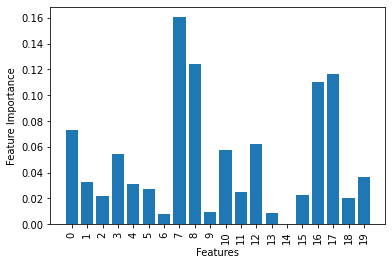

In [ ]:
# Plot the feature importances
plt.bar(range(X_names.shape[1]), importances)
plt.xlabel("Features")
plt.ylabel("Feature Importance")

# Add feature names as x-tick labels
plt.xticks(range(X_names.shape[1]), range(X_names.shape[1]), rotation=90)

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

                                    precision    recall  f1-score   support

                    Arte y Cultura       1.00      1.00      1.00         3
                 Asistencia Social       0.71      0.71      0.71         7
                  Derechos Humanos       1.00      0.91      0.95        11
Desarrollo económico y comunitario       0.71      1.00      0.83         5
                         Educación       1.00      0.67      0.80         3
                    Medio Ambiente       1.00      0.60      0.75         5
                          Religion       0.57      0.67      0.62         6
                             Salud       0.75      1.00      0.86         3

                          accuracy                           0.81        43
                         macro avg       0.84      0.82      0.82        43
                      weighted avg       0.84      0.81      0.82        43



# XGBOOST

In [ ]:
y = samples_without_actividad['Correct '].values
X = samples_without_actividad[samples_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords'])].values

In [ ]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the multi-class classifier
clf = XGBClassifier(objective='multi:softprob', num_class=8)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)
clf.score(X_test, y_test)

0.9302325581395349

In [ ]:
predictions

array(['Salud', 'Derechos Humanos', 'Religion', 'Asistencia Social',
       'Desarrollo económico y comunitario', 'Derechos Humanos',
       'Educación', 'Medio Ambiente',
       'Desarrollo económico y comunitario', 'Derechos Humanos',
       'Desarrollo económico y comunitario',
       'Desarrollo económico y comunitario', 'Medio Ambiente', 'Religion',
       'Medio Ambiente', 'Desarrollo económico y comunitario',
       'Derechos Humanos', 'Medio Ambiente', 'Derechos Humanos',
       'Derechos Humanos', 'Salud', 'Religion', 'Religion',
       'Derechos Humanos', 'Salud', 'Religion', 'Derechos Humanos',
       'Derechos Humanos', 'Derechos Humanos', 'Medio Ambiente',
       'Derechos Humanos', 'Religion', 'Derechos Humanos'], dtype=object)

In [ ]:
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))

                                    precision    recall  f1-score   support

                    Arte y Cultura       1.00      1.00      1.00         1
                 Asistencia Social       0.70      1.00      0.82         7
                  Derechos Humanos       1.00      1.00      1.00        11
Desarrollo económico y comunitario       1.00      1.00      1.00         6
                         Educación       1.00      1.00      1.00         2
                    Medio Ambiente       1.00      1.00      1.00         6
                          Religion       1.00      0.67      0.80         6
                             Salud       1.00      0.75      0.86         4

                          accuracy                           0.93        43
                         macro avg       0.96      0.93      0.94        43
                      weighted avg       0.95      0.93      0.93        43



## Evaluating the model 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
clf.score(X_train, y_train)

0.9933774834437086

In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.75

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[0, 1, 0, 1, 1, 0],
       [0, 4, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [ ]:
original_labels_test

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))


                                    precision    recall  f1-score   support

                    Arte y Cultura       1.00      0.67      0.80         3
                 Asistencia Social       0.71      0.71      0.71         7
                  Derechos Humanos       1.00      0.89      0.94         9
Desarrollo económico y comunitario       0.67      0.80      0.73         5
                         Educación       1.00      0.50      0.67         2
                    Medio Ambiente       1.00      1.00      1.00         2
                          Religion       0.71      1.00      0.83         5
                             Salud       1.00      1.00      1.00         5

                          accuracy                           0.84        38
                         macro avg       0.89      0.82      0.84        38
                      weighted avg       0.87      0.84      0.84        38



In [ ]:
print(classification_report(original_labels, original_labels_test))


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0], 
          filled=True, impurity=True, 
          rounded=True)

## Using the model on the main data 

In [ ]:
mexico_without_actividad = mexico.drop(mexico.filter(regex='ACTIVIDAD.*').columns, axis=1)

In [ ]:
mexico_without_actividad

In [ ]:
X_mexico = mexico_without_actividad[mexico_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords' ])].values

In [ ]:
X_mexico = mexico_without_actividad[mexico_without_actividad.columns.difference(['Correct ', 'CLUNI', 'RAZON SOCIAL', 'OBJETO SOCIAL', 'text_without_stopwords', 'Apoyo a otras Donatarias'])].values

In [ ]:
X_names

In [ ]:
predictions = clf.predict(X_mexico)
#real_names = le.inverse_transform(predictions)

In [ ]:
predictions

array(['Educación', 'Asistencia Social', 'Asistencia Social', ...,
       'Asistencia Social', 'Desarrollo económico y comunitario',
       'Asistencia Social'], dtype=object)

In [ ]:
predicted_labels = pd.Series(predictions)


In [ ]:
predicted_labels
real_names = le.inverse_transform(predicted_labels)

In [ ]:
real_names

array(['Asistencia Social', 'Educación', 'Asistencia Social', ...,
       'Apoyo a otras Donatarias', 'Desarrollo económico y comunitario',
       'Arte y Cultura'], dtype=object)

In [ ]:
mexico = mexico.assign(Final=predicted_labels)

In [ ]:
mexico

,CLUNI,RAZON SOCIAL,ACTIVIDAD 1,ACTIVIDAD 2,ACTIVIDAD 3,ACTIVIDAD 4,ACTIVIDAD 5,ACTIVIDAD 6,ACTIVIDAD 7,ACTIVIDAD 8,...,Educación title,Salud title,Other title,Asistencia Social ac,Arte y Cultura ac,Medio Ambiente ac,Desarrollo económico y comunitario ac,Derechos Humanos ac,Salud ac,Final
0,NNS01012922016,Niños y Niñas de la Sierra,0,0,0,0,1,0,0,1,...,0.303168,0.171344,0.149044,1,1,0,1,0,0,Educación
1,BAC99031115011,Banco de Alimentos de Cuautitlán Izcalli,0,1,0,0,0,0,0,0,...,0.163671,0.178414,0.172105,0,0,0,1,0,0,Asistencia Social
2,COC9412120901C,COCOMI,1,0,1,0,0,1,0,0,...,0.175625,0.364375,0.153939,1,1,1,0,2,1,Asistencia Social
3,NAM0405240901F,Nuestro Amigo México,0,0,0,0,1,0,0,0,...,0.168418,0.104371,0.122855,1,1,1,0,0,1,Asistencia Social
4,BIA9212300501B,Banco Internacional de Alimentos,1,1,0,0,0,0,0,0,...,0.219060,0.138652,0.234715,1,0,0,1,0,0,Asistencia Social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,CAF180621115SQ,Casa de Asistencia Femenil Un Acto de Dios,1,1,0,0,0,0,0,0,...,0.072564,0.110724,0.065014,1,0,0,1,0,1,Religion
7345,LAU19073009OX2,Lazos de Ayuda para un Bienestar Común,1,0,0,0,1,0,0,0,...,0.186710,0.159086,0.276938,2,0,0,1,1,0,Asistencia Social
7346,CFP19021915676,Celta Fenix PVM,1,0,0,0,1,0,1,1,...,0.204181,0.171276,0.250548,3,0,0,2,0,0,Asistencia Social
7347,FKA030120095TN,Fundación Kaluz,1,0,1,0,0,0,0,1,...,0.190556,0.080549,0.258841,1,1,1,1,1,0,Desarrollo económico y comunitario


# Output the data

In [ ]:
mexico

In [ ]:
mexico.to_csv('final V4.csv', encoding='utf-8')

In [ ]:
pip install pandas==1.3.0